# Flagging Change

## Flagging Repeating Patterns

We have a list of transactions for properties sold. This could signal neighborhoods getting gentrified, or properties being bought and sold short-term by investors rather than people looking to be part of a community.

We want to:

1. Find repeat sales of the same property (sold more than n times)
2. find the price increase or decrease from previous sale.
3. find price percentage change

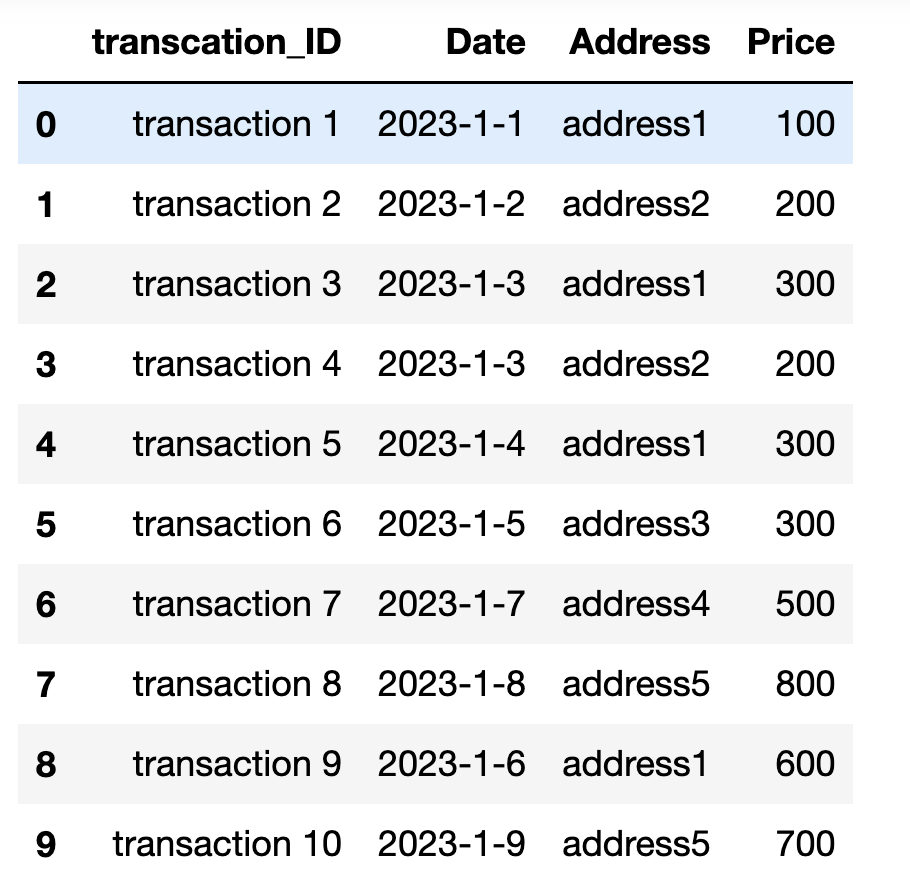







## what is my overall approach?

## Pandas methods needed
We'll tap several Pandas methods for these taks:



- ```.diff()```
- ```.pct_change()```
- ```loc[]``` v. ```iloc[]```
- ```duplicated()```
- ```lambda()```
- ```groupby()```




First we'll see how does each method works, and then we'll bring them all together at the end.



In [1]:
## libraries
import pandas as pd

## Over time calculations

In [3]:
## run this cell

df = pd.DataFrame({
        "sales": [10, 12, 25, 4, 92, 66, 30, 31, 20, 20, 7, 9, 14, 19, 17, 25, 10, 8, 19, 31, 16 ]
    },
    index=pd.date_range("2025-01-01", freq='D', periods=21)
)

df

## For example, how do we calculate the sales difference Jan. 1 and Jan. 2, Jan. 2 and Jan. 3 etc...

,sales
2025-01-01,10
2025-01-02,12
2025-01-03,25
2025-01-04,4
2025-01-05,92
2025-01-06,66
2025-01-07,30
2025-01-08,31
2025-01-09,20
2025-01-10,20


In [5]:
# 1 day difference - place cursor in the parenthesis and use shift tab to see docstring 

df["1day-diff"] = df["sales"].diff()
df

,sales,1day-diff
2025-01-01,10,NaN
2025-01-02,12,2.0
2025-01-03,25,13.0
2025-01-04,4,-21.0
2025-01-05,92,88.0
2025-01-06,66,-26.0
2025-01-07,30,-36.0
2025-01-08,31,1.0
2025-01-09,20,-11.0
2025-01-10,20,0.0


## ```.diff()```

we can also use ```.diff()``` calculates the change between a value and its previous value, typically used to measure differences over time.

In [7]:
## 7 day period
df["7day-diff"] = df["sales"].diff(7)
df

,sales,1day-diff,7day-diff
2025-01-01,10,NaN,NaN
2025-01-02,12,2.0,NaN
2025-01-03,25,13.0,NaN
2025-01-04,4,-21.0,NaN
2025-01-05,92,88.0,NaN
2025-01-06,66,-26.0,NaN
2025-01-07,30,-36.0,NaN
2025-01-08,31,1.0,21.0
2025-01-09,20,-11.0,8.0
2025-01-10,20,0.0,-5.0


In [9]:
#reset our df
df = pd.DataFrame({
        "sales": [10, 12, 25, 4, 92, 66, 30, 31, 20, 20, 7, 9, 14, 19, 17, 25, 10, 8, 19, 31, 16 ]
    },
    index=pd.date_range("2025-01-01", freq='D', periods=21)
)

df

,sales
2025-01-01,10
2025-01-02,12
2025-01-03,25
2025-01-04,4
2025-01-05,92
2025-01-06,66
2025-01-07,30
2025-01-08,31
2025-01-09,20
2025-01-10,20


#### By what percentage did the sales increase or decrease from one day to another

Here we use the ```.pct_change()``` method. 

It does only one thing: calculates the percentage change between the **current** value and a **prior** value.

In [25]:
## calculate here - if it was accross the rows, we'd have to do a lambda expression

df["1day-diff"] = (df["sales"].pct_change() *100).round(1)
df

,sales,1day-diff,7day-diff
2025-01-01,10,NaN,NaN
2025-01-02,12,20.0,NaN
2025-01-03,25,108.3,NaN
2025-01-04,4,-84.0,NaN
2025-01-05,92,2200.0,NaN
2025-01-06,66,-28.3,NaN
2025-01-07,30,-54.5,NaN
2025-01-08,31,3.3,210.0
2025-01-09,20,-35.5,66.7
2025-01-10,20,0.0,-20.0


#### What about compared to exactly 7 days earlier?

The ```pct_change()``` method has a default ```period``` parameter of 1 day.

We can change that.

In [27]:
## 7 DAY PERIOD
df["7day-diff"] = (df["sales"].pct_change(7) *100).round(1)
df

,sales,1day-diff,7day-diff
2025-01-01,10,NaN,NaN
2025-01-02,12,20.0,NaN
2025-01-03,25,108.3,NaN
2025-01-04,4,-84.0,NaN
2025-01-05,92,2200.0,NaN
2025-01-06,66,-28.3,NaN
2025-01-07,30,-54.5,NaN
2025-01-08,31,3.3,210.0
2025-01-09,20,-35.5,66.7
2025-01-10,20,0.0,-20.0


## Back to our challenge

In [119]:
## mock data
df = pd.read_csv("https://raw.githubusercontent.com/sandeepmj/datasets/main/mock_property_sales.csv")
df

,transcation_ID,Date,Address,Price
0,transaction 1,2023-01-01,address1,100
1,transaction 2,2023-01-02,address2,200
2,transaction 3,2023-01-03,address1,300
3,transaction 4,2023-01-03,address2,200
4,transaction 5,2023-01-04,address1,300
...,...,...,...,...
85,transaction 21,2024-11-27,address16,1100
86,transaction 26,2024-12-12,address11,1675
87,transaction 81,2024-12-16,address16,925
88,transaction 29,2024-12-19,address2,1925


### Goal
We have a list of transactions for properties sold.

We want to:

1. Find repeat sales of the same property (sold more than n times)
2. find the price increase or decrease from previous sale.
3. find price percentage change

#### Several ways to filter to show more than 1 sale, but here is one:

In [33]:
## show any addresses sold more than once
## but appears as bool only
df["Address"].value_counts() > 1

Address
address1      True
address2      True
address11     True
address22     True
address20     True
address3      True
address15     True
address7      True
address16     True
address23     True
address25     True
address5      True
address4      True
address12     True
address21     True
address18     True
address9      True
address24     True
address13     True
address19     True
address6     False
address17    False
address14    False
Name: count, dtype: bool

In [41]:
## note that the address field is the "label" index - when you do value counts, that particular column becomes an index
df["Address"].value_counts().to_frame("soldXtimes")

,soldXtimes
Address,
address1,10
address2,7
address11,6
address22,6
address20,6
address3,5
address15,5
address7,4
address16,4


In [45]:
## Count the values, even if just 1
## store in variable but not as a dataframe

multi_count = df["Address"].value_counts()
multi_count


Address
address1     10
address2      7
address11     6
address22     6
address20     6
address3      5
address15     5
address7      4
address16     4
address23     4
address25     4
address5      4
address4      4
address12     3
address21     3
address18     3
address9      3
address24     2
address13     2
address19     2
address6      1
address17     1
address14     1
Name: count, dtype: int64

In [53]:
## return counts that are more than 1 as a df
multi_count[multi_count > 1].to_frame("soldXtimes")

,soldXtimes
Address,
address1,10
address2,7
address11,6
address22,6
address20,6
address3,5
address15,5
address7,4
address16,4


In [55]:
## using lambda and loc
df["Address"].value_counts().loc[lambda x: x >1].to_frame("No. of times sold")

,No. of times sold
Address,
address1,10
address2,7
address11,6
address22,6
address20,6
address3,5
address15,5
address7,4
address16,4


## Accessing cells in Pandas dataframes

### ```iloc[]``` v. ```loc[]```

##### ```.iloc[]```

Access df data by integer-location based indexing for selection by position. This simply means the ```0, 1, 2, 3...``` default index you are used to seeing.

```df.iloc[start_index:end_index]``` returns a slice of the data based on positional values

In [57]:
## create a dataset with default integer based indexing
dx = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie","Alice", "David", "Mike", "Alice"],
    "Age": [24, 27, 22, 30, 42, 23, 92]
})

dx

,Name,Age
0,Alice,24
1,Bob,27
2,Charlie,22
3,Alice,30
4,David,42
5,Mike,23
6,Alice,92


In [59]:
## return the first 3 items
dx.iloc[:3]

,Name,Age
0,Alice,24
1,Bob,27
2,Charlie,22


In [ ]:
## very similar to slice df


In [63]:
## return what's the 4th item as
dx.iloc[3]["Age"]

30

In [65]:
## what type is it?
type(dx.iloc[3]["Age"])

numpy.int64

In [ ]:
## slicing a single item won't work
## will break


So far nearly all our dataframes have had the default index.

But what if that is not the case:


In [67]:
## create a dataset with label based indexing
dx = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie","Alice", "David", "Mike", "Alice"],
    "Age": [24, 27, 22, 30, 42, 23, 92]
}, index=["A", "B", "C", "D", "E", "F", "G"])

dx

,Name,Age
A,Alice,24
B,Bob,27
C,Charlie,22
D,Alice,30
E,David,42
F,Mike,23
G,Alice,92


In [69]:
## i can still call the 4th item
dx.iloc[3]

Name    Alice
Age        30
Name: D, dtype: object

```loc[]```

If ```iloc[]``` is integer-location based indexing, then ```loc[]``` is label-based indexing.

In [ ]:
## call positiion 4 with loc
## will break


In [ ]:
## call the label in the 4th position


In [71]:
dx.loc["D": "F"]

,Name,Age
D,Alice,30
E,David,42
F,Mike,23


In [87]:
## so to repeat the expression -cnnot be done using iloc.
# df["Address"].value_counts().iloc[lambda x: x >1].to_frame("No. of times sold")

## What  ```x``` stand for:

- ```x``` is a single value representing a cell in the column ```"address"```
- ```loc``` pulls in a value based on the label field (addresses)
-  The ```lambda function``` takes each individual number (x) from "address" and checks it if is greater than 1.

Back to our challenge:
We only know how many times something sold. We need by what amount it changed, both in absolute terms but percent change.

## ```duplicated()```

```duplicated(subset="col", keep=False)```

- look at a specific column
- marks rows as ```True``` where values appear more than once


Unfortunately, this method has one of the most counterintuitive parameters, ```keep```.

- ```keep=first``` marks the first one as not a duplicate and all subsequent ones as duplicates.

- ```keep=last``` marks all previous ones as duplicates and only the last one as not a duplicate.

- ```keep=False``` marks ALL occurrences as duplicates (including the first and last ones)

And by the way, ```keep```, doesn't actually keep anything. So, yep, totally counterintuitive.


In [75]:
dfd = pd.DataFrame({
    "Name": ["Alice", "Alice",  "Alice"],
    "Age": [24, 24, 24, ]
})

dfd

,Name,Age
0,Alice,24
1,Alice,24
2,Alice,24


In [79]:
## first doesnt count as duplicate - keep first is default but just mentioned here to see
dfd.duplicated("Name", keep="first")

0    False
1     True
2     True
dtype: bool

In [81]:
## last doesnt count as duplicate
dfd.duplicated("Name", keep="last")

0     True
1     True
2    False
dtype: bool

In [85]:
## none count as duplicates
dfd.duplicated("Name", keep= False)

0    True
1    True
2    True
dtype: bool

In [89]:
## filters for true or false and returns true or false - df becayse now we go back to actual dataset
df.duplicated("Address", keep =False)

0     True
1     True
2     True
3     True
4     True
      ... 
85    True
86    True
87    True
88    True
89    True
Length: 90, dtype: bool

In [91]:
## show actual transactions for properties that appear more than once -- this is a mask
df[df.duplicated("Address", keep =False)]

,transcation_ID,Date,Address,Price
0,transaction 1,2023-01-01,address1,100
1,transaction 2,2023-01-02,address2,200
2,transaction 3,2023-01-03,address1,300
3,transaction 4,2023-01-03,address2,200
4,transaction 5,2023-01-04,address1,300
...,...,...,...,...
85,transaction 21,2024-11-27,address16,1100
86,transaction 26,2024-12-12,address11,1675
87,transaction 81,2024-12-16,address16,925
88,transaction 29,2024-12-19,address2,1925


In [121]:
## find addresses which were bought and sold multiple times.
## we can use duplicated to our advantage
multi_sales = df[df.duplicated("Address", keep =False)]
multi_sales

,transcation_ID,Date,Address,Price
0,transaction 1,2023-01-01,address1,100
1,transaction 2,2023-01-02,address2,200
2,transaction 3,2023-01-03,address1,300
3,transaction 4,2023-01-03,address2,200
4,transaction 5,2023-01-04,address1,300
...,...,...,...,...
85,transaction 21,2024-11-27,address16,1100
86,transaction 26,2024-12-12,address11,1675
87,transaction 81,2024-12-16,address16,925
88,transaction 29,2024-12-19,address2,1925


In [99]:
## call an addresss - to check- address 14 is not here but address 1 is.
multi_sales.query("Address == 'address1'")

,transcation_ID,Date,Address,Price
0,transaction 1,2023-01-01,address1,100
2,transaction 3,2023-01-03,address1,300
4,transaction 5,2023-01-04,address1,300
6,transaction 9,2023-01-06,address1,600
14,transaction 79,2023-03-06,address1,1700
22,transaction 69,2023-05-23,address1,700
23,transaction 38,2023-05-30,address1,1275
32,transaction 58,2023-07-18,address1,1200
55,transaction 74,2024-03-26,address1,100
60,transaction 67,2024-04-21,address1,550


#### Calculate price change

In [123]:
## absolute diff - this will group the df by address, and return the  difference in price for each sale. 
multi_sales["price_diff"] = multi_sales.groupby("Address")["Price"].diff()
multi_sales.sort_values(by= ["Address", "Date"])

/var/folders/7k/dkrw1dkn70xb44njcjrldx2w0000gn/T/ipykernel_72600/3432175493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_sales["price_diff"] = multi_sales.groupby("Address")["Price"].diff()


,transcation_ID,Date,Address,Price,price_diff
0,transaction 1,2023-01-01,address1,100,NaN
2,transaction 3,2023-01-03,address1,300,200.0
4,transaction 5,2023-01-04,address1,300,0.0
6,transaction 9,2023-01-06,address1,600,300.0
14,transaction 79,2023-03-06,address1,1700,1100.0
...,...,...,...,...,...
56,transaction 44,2024-03-27,address7,1175,1075.0
70,transaction 57,2024-06-14,address7,175,-1000.0
21,transaction 35,2023-05-21,address9,1850,NaN
63,transaction 28,2024-04-30,address9,300,-1550.0


#### Calculate percentage change

In [129]:
## pct change
multi_sales["price_pct_chg"] = (multi_sales.groupby("Address")["Price"].pct_change() * 100).round(1)
multi_sales.sort_values(by= ["Address", "Date"])

/var/folders/7k/dkrw1dkn70xb44njcjrldx2w0000gn/T/ipykernel_72600/1122877915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_sales["price_pct_chg"] = (multi_sales.groupby("Address")["Price"].pct_change() * 100).round(1)


,transcation_ID,Date,Address,Price,price_diff,price_pct_chg
0,transaction 1,2023-01-01,address1,100,NaN,NaN
2,transaction 3,2023-01-03,address1,300,200.0,200.0
4,transaction 5,2023-01-04,address1,300,0.0,0.0
6,transaction 9,2023-01-06,address1,600,300.0,100.0
14,transaction 79,2023-03-06,address1,1700,1100.0,183.3
...,...,...,...,...,...,...
56,transaction 44,2024-03-27,address7,1175,1075.0,1075.0
70,transaction 57,2024-06-14,address7,175,-1000.0,-85.1
21,transaction 35,2023-05-21,address9,1850,NaN,NaN
63,transaction 28,2024-04-30,address9,300,-1550.0,-83.8
